# To Explore Buisness Analytics

# Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

# import Data

In [2]:
dataset = pd.read_csv('SampleSuperstore.csv')

In [3]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Checking Missing Values

In [4]:
dataset.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


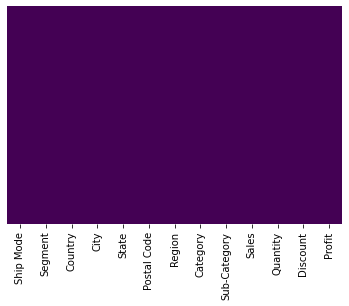

In [5]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# drop the postal code variable 

In [9]:
col= ['Postal Code']
dataset1 = dataset.drop(columns=col, axis=1)

# Correlation Between Variables

In [10]:
dataset1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


# Data Visualization

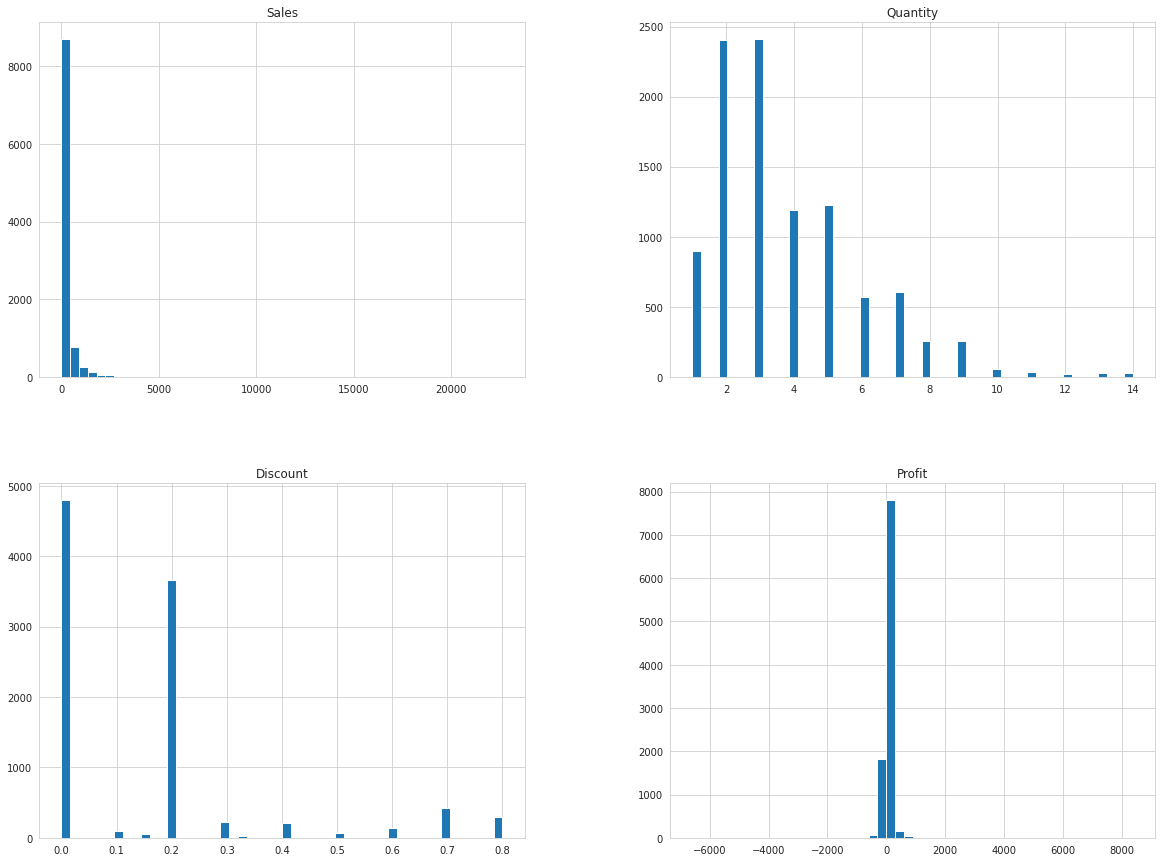

In [11]:
sns.set_style('whitegrid')
dataset1.hist(bins=50, figsize=(20,15))
plt.show()

# Cluster Analysis

In [12]:
x = dataset.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

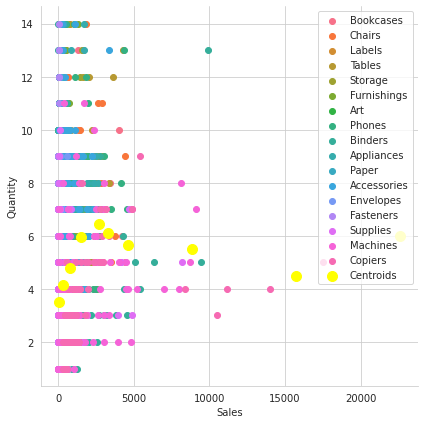

In [13]:
sns.set_style("whitegrid") 
sns.FacetGrid(dataset, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

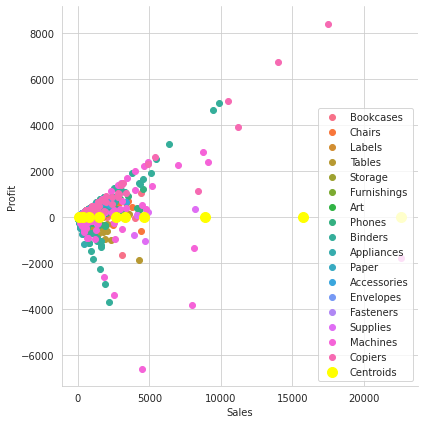

In [14]:
sns.set_style("whitegrid") 
sns.FacetGrid(dataset, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

From above clustering we can see that in which Category profits are hign or less, We can improve in that states by providing discounts.

# ----------------------------------------------------------------------------------------------------

To get to know where to give discount the clear overview of sales and discount of every segment 

# Sales From Every Segment Of United States of Whole Data

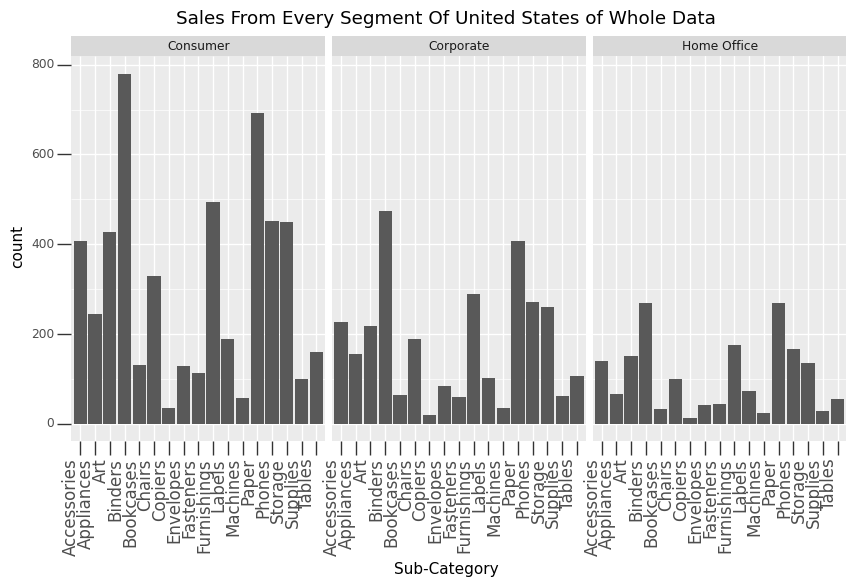

<ggplot: (-9223363264620213693)>

In [15]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(dataset, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

# Discount on Categories From Every Segment Of United States of Whole Data

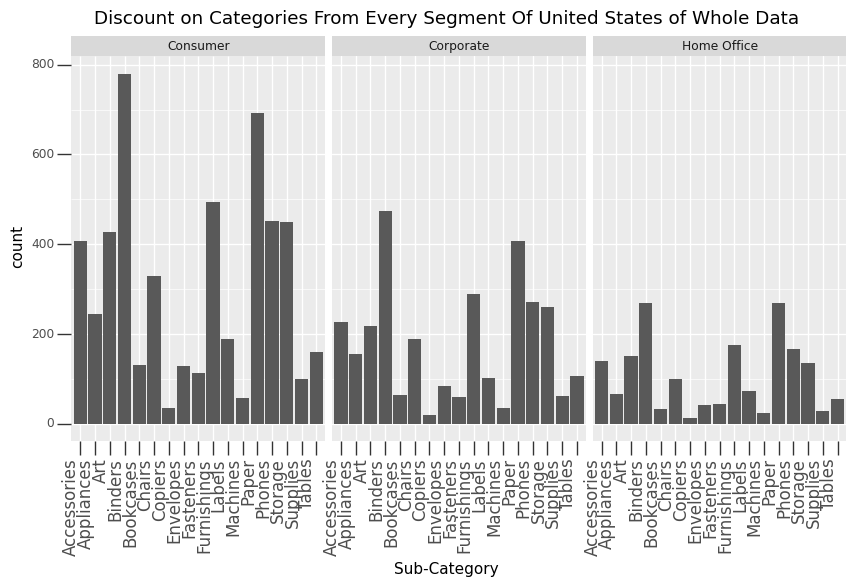

<ggplot: (-9223363264620228871)>

In [16]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(dataset, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))